In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.2


In [2]:
column_names = []
column_names.append('start_price')
column_names.append('high_price')
column_names.append('low_price')
column_names.append('end_price')
column_names.append('volume')
for i in range(119):
    column_names.append('{}_minutes_ago_start_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_high_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_low_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_end_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_volume'.format(str(i+1)))
column_names.append('after_5_minutes_price')
column_names
len(column_names)

601

In [3]:
raw_dataset = pd.read_csv('./data/use_volume.csv', names=column_names, na_values='?', comment='\t',sep=',', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,start_price,high_price,low_price,end_price,volume,1_minutes_ago_start_price,1_minutes_ago_high_price,1_minutes_ago_low_price,1_minutes_ago_end_price,1_minutes_ago_volume,...,118_minutes_ago_high_price,118_minutes_ago_low_price,118_minutes_ago_end_price,118_minutes_ago_volume,119_minutes_ago_start_price,119_minutes_ago_high_price,119_minutes_ago_low_price,119_minutes_ago_end_price,119_minutes_ago_volume,after_5_minutes_price
2022-06-22 16:01:00,2728634,2737230,2728407,2732503,8.449134,2726399,2730969,2726399,2729999,3.354000,...,2810202,2806474,2806965,1.330600,2822117,2822117,2810000,2811695,7.635606,2711131
2022-06-22 16:02:00,2733922,2742422,2732897,2736899,8.942485,2728634,2737230,2728407,2732503,8.449134,...,2809482,2801410,2805357,7.048800,2810202,2810202,2806474,2806965,1.330600,2704632
2022-06-22 16:03:00,2735890,2737534,2727277,2728727,7.090112,2733922,2742422,2732897,2736899,8.942485,...,2811765,2804029,2809534,4.500261,2807742,2809482,2801410,2805357,7.048800,2702521
2022-06-22 16:04:00,2727163,2731982,2726019,2728158,7.655116,2735890,2737534,2727277,2728727,7.090112,...,2811765,2808569,2808569,1.285579,2805981,2811765,2804029,2809534,4.500261,2707121
2022-06-22 16:05:00,2729730,2732157,2711992,2720238,18.331998,2727163,2731982,2726019,2728158,7.655116,...,2809906,2806969,2808734,0.932870,2811196,2811765,2808569,2808569,1.285579,2711812


In [4]:
train_dataset = dataset.sample(frac=0.9, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [5]:
train_stats = train_dataset.describe()
train_stats.pop("after_5_minutes_price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
start_price,15475.0,3.038064e+06,439663.624980,2379634.000,2.760312e+06,2.852088e+06,3.179074e+06,4.040215e+06
high_price,15475.0,3.040906e+06,439319.333759,2383132.000,2.762402e+06,2.854801e+06,3.184263e+06,4.041600e+06
low_price,15475.0,3.035209e+06,439929.899286,2377167.000,2.758166e+06,2.849131e+06,3.172882e+06,4.034901e+06
end_price,15475.0,3.037998e+06,439622.502938,2377777.000,2.760228e+06,2.852045e+06,3.179732e+06,4.040215e+06
volume,15475.0,3.399520e+00,4.258055,0.001,8.598854e-01,2.235483e+00,4.393369e+00,1.058081e+02
...,...,...,...,...,...,...,...,...
119_minutes_ago_start_price,15475.0,3.046430e+06,446258.677650,2380979.000,2.760628e+06,2.855364e+06,3.220990e+06,4.040215e+06
119_minutes_ago_high_price,15475.0,3.049261e+06,445907.641640,2383132.000,2.762776e+06,2.858523e+06,3.227127e+06,4.041600e+06
119_minutes_ago_low_price,15475.0,3.043576e+06,446531.741965,2377167.000,2.758576e+06,2.852623e+06,3.215000e+06,4.034901e+06
119_minutes_ago_end_price,15475.0,3.046357e+06,446207.946290,2377777.000,2.760636e+06,2.855373e+06,3.222962e+06,4.040215e+06


In [6]:
train_labels = train_dataset.pop('after_5_minutes_price')
test_labels = test_dataset.pop('after_5_minutes_price')

In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [8]:
def build_model():
  model = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(2, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1202      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________


In [10]:
example_batch = normed_train_data[:10]
example_batch

,start_price,high_price,low_price,end_price,volume,1_minutes_ago_start_price,1_minutes_ago_high_price,1_minutes_ago_low_price,1_minutes_ago_end_price,1_minutes_ago_volume,...,118_minutes_ago_start_price,118_minutes_ago_high_price,118_minutes_ago_low_price,118_minutes_ago_end_price,118_minutes_ago_volume,119_minutes_ago_start_price,119_minutes_ago_high_price,119_minutes_ago_low_price,119_minutes_ago_end_price,119_minutes_ago_volume
2022-06-22 00:19:00,-0.539838,-0.535155,-0.536140,-0.533748,-0.540962,-0.549812,-0.543830,-0.544973,-0.538839,0.224497,...,-0.463336,-0.468020,-0.467472,-0.471717,-0.084420,-0.458065,-0.464452,-0.458056,-0.462425,-0.623815
2022-06-16 18:42:00,-0.583633,-0.587277,-0.582061,-0.588811,-0.770192,-0.588174,-0.589234,-0.584289,-0.589100,0.079260,...,-0.594214,-0.598199,-0.591221,-0.591250,-0.424389,-0.590535,-0.597304,-0.590548,-0.592943,-0.602703
2022-06-20 22:03:00,-0.649945,-0.653616,-0.643069,-0.649862,-0.734965,-0.647473,-0.654436,-0.641541,-0.648343,-0.772031,...,-0.775760,-0.763427,-0.768856,-0.756361,-0.205160,-0.770379,-0.773222,-0.768961,-0.773043,-0.613673
2022-06-19 15:07:00,-0.931431,-0.934311,-0.927294,-0.934285,-0.729957,-0.936378,-0.937441,-0.929382,-0.930263,-0.696867,...,-0.961981,-0.966087,-0.955497,-0.961665,0.493797,-0.967052,-0.961608,-0.960325,-0.959110,-0.490400
2022-06-18 05:11:00,-0.640770,-0.644793,-0.634515,-0.637733,0.143371,-0.639301,-0.646241,-0.635247,-0.640744,-0.164537,...,-0.636655,-0.640292,-0.632596,-0.639253,-0.258082,-0.636750,-0.643599,-0.629968,-0.636658,-0.716289
2022-06-22 03:53:00,-0.626732,-0.628661,-0.621793,-0.621612,-0.406235,-0.633040,-0.631746,-0.626208,-0.626736,-0.379206,...,-0.577073,-0.582438,-0.583510,-0.590132,0.098742,-0.579105,-0.577704,-0.578325,-0.579431,-0.027792
2022-06-20 06:45:00,-0.760457,-0.760804,-0.758053,-0.760020,-0.603285,-0.755650,-0.762698,-0.751265,-0.758145,-0.790432,...,-0.768120,-0.770710,-0.761221,-0.765275,-0.565590,-0.760679,-0.767624,-0.764041,-0.766886,-0.510200
2022-06-20 03:14:00,-0.790157,-0.797245,-0.784675,-0.791567,-0.776885,-0.794408,-0.797035,-0.790784,-0.789945,-0.659063,...,-0.816276,-0.814283,-0.829356,-0.836155,1.380316,-0.808339,-0.814905,-0.812931,-0.814604,1.005880
2022-06-21 05:31:00,-0.527822,-0.531563,-0.526257,-0.530907,-0.368384,-0.542167,-0.539101,-0.535384,-0.535036,0.019212,...,-0.654134,-0.655605,-0.648818,-0.655487,-0.407044,-0.656158,-0.661004,-0.651695,-0.655924,-0.222510
2022-06-19 12:27:00,-0.880599,-0.884735,-0.873576,-0.879088,-0.444300,-0.873645,-0.880787,-0.883738,-0.884118,0.924677,...,-0.863847,-0.860912,-0.873828,-0.880659,0.237032,-0.856807,-0.833642,-0.876134,-0.862234,3.014005


In [11]:
example_result = model.predict(example_batch)
example_result

array([[0.3451168 ],
       [0.54056615],
       [0.23911245],
       [0.26854414],
       [0.6652766 ],
       [0.33569854],
       [0.40383896],
       [0.32033497],
       [0.5481335 ],
       [0.05177353]], dtype=float32)

In [12]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 4000

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...................................................................

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
862,182869392.0,9508.090820,182869392.0,191260944.0,9599.185547,191260944.0,862
863,182958752.0,9525.023438,182958752.0,203347232.0,10124.290039,203347232.0,863
864,182119376.0,9501.949219,182119376.0,193076736.0,10133.578125,193076736.0,864
865,181970176.0,9491.299805,181970176.0,189082880.0,9970.692383,189082880.0,865
866,181082496.0,9495.034180,181082496.0,223596640.0,11475.465820,223596640.0,866


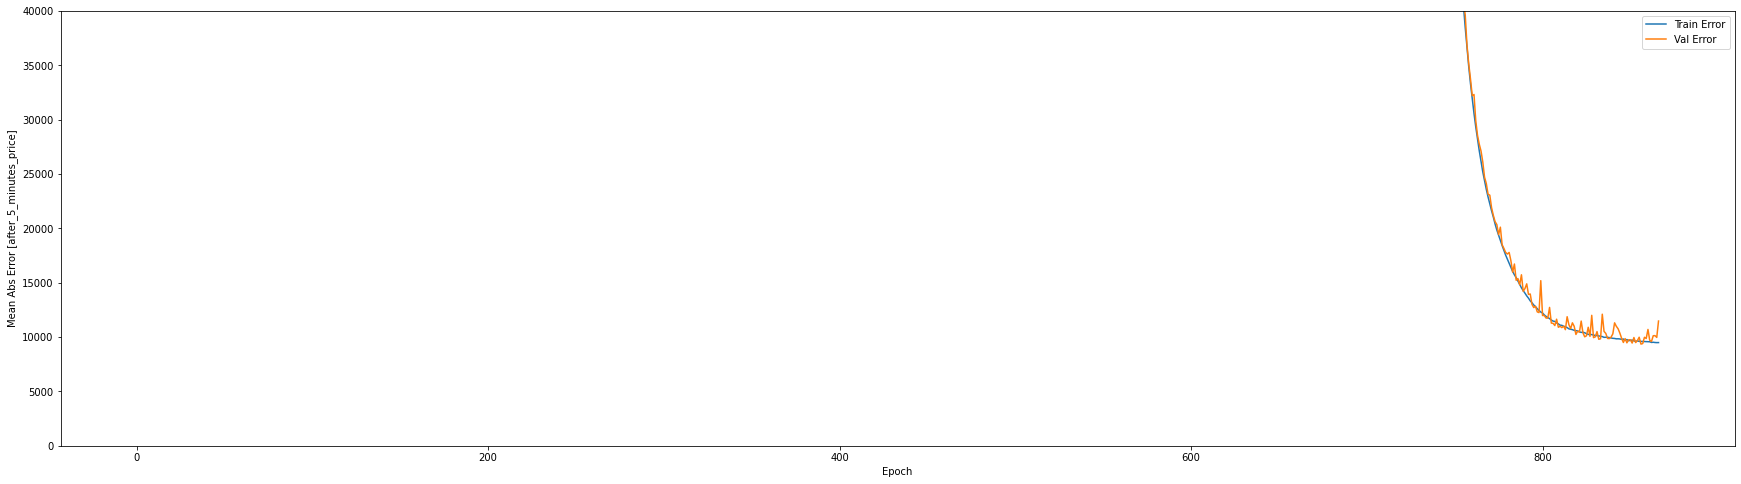

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(30,8))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [after_5_minutes_price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()

  # plt.figure(figsize=(6,4))
  # plt.xlabel('Epoch')
  # plt.ylabel('Mean Square Error [$after_5_minutes_price^2$]')
  # plt.plot(hist['epoch'], hist['mse'],
  #          label='Train Error')
  # plt.plot(hist['epoch'], hist['val_mse'],
  #          label = 'Val Error')
  # plt.ylim([0,20])
  # plt.legend()
  plt.show()

plot_history(history)

In [15]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} after_5_minutes_price".format(mae))

54/54 - 0s - loss: 231422192.0000 - mae: 11434.5469 - mse: 231422192.0000
Testing set Mean Abs Error: 11434.55 after_5_minutes_price


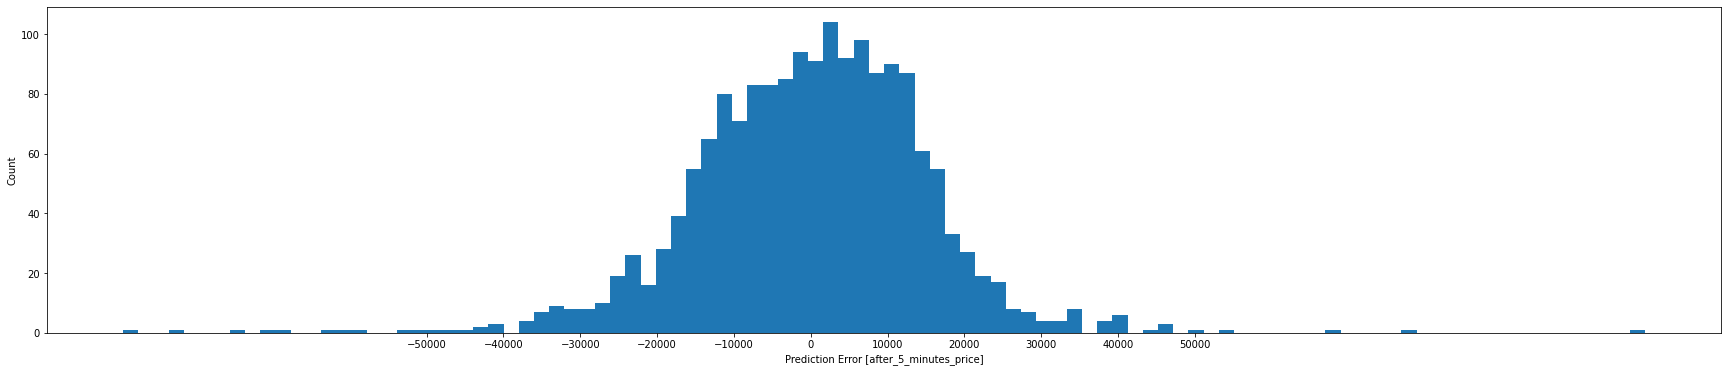

In [16]:
test_predictions = model.predict(normed_test_data).flatten()
error = test_predictions - test_labels
plt.figure(figsize=(30,6))
plt.xticks([-50000, -40000, -30000, -20000, -10000, 0, 10000, 20000, 30000, 40000, 50000])
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [after_5_minutes_price]")
_ = plt.ylabel("Count")